## Table Of Contents
* [1- Loading the Dataset](#1-LoadingtheDataset)
* [2- Data-Preprocessing](#Data-Preprocessing)

<h1>1- Loading the Dataset </h1>

In [210]:
import pandas as pd
import numpy as np

In [211]:
data = pd.read_csv(r'dataset//cell2celltrain.csv', delimiter = ",",  header = 0, index_col = 0)

In [212]:
data.shape


(51047, 57)

In [213]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  object 
 1   MonthlyRevenue             50891 non-null  float64
 2   MonthlyMinutes             50891 non-null  float64
 3   TotalRecurringCharge       50891 non-null  float64
 4   DirectorAssistedCalls      50891 non-null  float64
 5   OverageMinutes             50891 non-null  float64
 6   RoamingCalls               50891 non-null  float64
 7   PercChangeMinutes          50680 non-null  float64
 8   PercChangeRevenues         50680 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  

In [214]:
data.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,6,No,0,10,No,4-Medium,Other,Other,No
3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


<h1> 2- Data-Preprocessing </h1> 

<b>checking if there are rows that contain empty enteries</b>

In [7]:
rows_without_missing_data = data.dropna()

print(f"all rows: {data.shape}") 
print(f"rows without missing data: {rows_without_missing_data.shape}")
rows_w_missing_data=data.shape[0]-rows_without_missing_data.shape[0]


all rows: (51047, 57)
rows without missing data: (49752, 57)


In [8]:
rows_w_missing_data=data.shape[0]-rows_without_missing_data.shape[0]

In [9]:
rows_w_missing_data

1295

<b>checking that values of dependent variable (Churn) contains only either Yes or No  </b>

In [10]:
data['Churn'].unique()

array(['Yes', 'No'], dtype=object)

<b> Confirmed. no mistakes in data entry for this Class</b>

<h3>There are columns in the data that are of type "object" and it is unclear what their real data type is supposed to look like. </h3> </br>
<b>attempting to figure which coloumns are categorical, which are boolean, and which are strings</b>

In [15]:
for column in data.columns:
    if len(data[column].unique()) <= 10:
        print(data[column].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Known' 'Unknown']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
[1 0 3 2 4]
[0 1 2 3]
['No' 'Yes']
['No' 'Yes']
[4 5 6 9 1 7 3 0 8 2]
['No' 'Yes']
['Yes' 'No']
['1-Highest' '4-Medium' '3-Good' '6-VeryLow' '2-High' '5-Low' '7-Lowest']
['Suburban' 'Town' 'Other' 'Rural']
['Professional' 'Crafts' 'Other' 'Self' 'Retired' 'Homemaker' 'Clerical'
 'Student']
['No' 'Yes' 'Unknown']


In [21]:
# select only the categorical columns
cat_df = data.select_dtypes(include='int')
# print the column names and the unique values
for col in cat_df.columns:
    print(col)
    print(cat_df[col].unique())


MonthsInService
[61 58 60 59 53 57 55 56 54 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38
 37 36 35 34 33 32 29 31 30 23 24 28 12 27 26 25  8 10 22 19 21 18 20 17
 15 14 16 13 11  9  7  6]
UniqueSubs
[  2   1   3   5   6   4   7  12  11   9   8  10  13  18 196]
ActiveSubs
[ 1  2  3  4  0  5  8  6  9 53 11  7]
RetentionCalls
[1 0 3 2 4]
RetentionOffersAccepted
[0 1 2 3]
ReferralsMadeBySubscriber
[ 0  1  2  3  4  7  5  6 16 11  8  9 35]
IncomeGroup
[4 5 6 9 1 7 3 0 8 2]
AdjustmentsToCreditRating
[ 0  1  3  2  5  4  9  6 10  8  7 11 25 21 12]


In [22]:
import pandas as pd

# apply the type function to each element
types = data.apply(lambda x: x.apply(type))
# get the unique types for each column
for col in types.columns:
    print(col)
    print(types[col].unique())


Churn
[<class 'str'>]
MonthlyRevenue
[<class 'float'>]
MonthlyMinutes
[<class 'float'>]
TotalRecurringCharge
[<class 'float'>]
DirectorAssistedCalls
[<class 'float'>]
OverageMinutes
[<class 'float'>]
RoamingCalls
[<class 'float'>]
PercChangeMinutes
[<class 'float'>]
PercChangeRevenues
[<class 'float'>]
DroppedCalls
[<class 'float'>]
BlockedCalls
[<class 'float'>]
UnansweredCalls
[<class 'float'>]
CustomerCareCalls
[<class 'float'>]
ThreewayCalls
[<class 'float'>]
ReceivedCalls
[<class 'float'>]
OutboundCalls
[<class 'float'>]
InboundCalls
[<class 'float'>]
PeakCallsInOut
[<class 'float'>]
OffPeakCallsInOut
[<class 'float'>]
DroppedBlockedCalls
[<class 'float'>]
CallForwardingCalls
[<class 'float'>]
CallWaitingCalls
[<class 'float'>]
MonthsInService
[<class 'int'>]
UniqueSubs
[<class 'int'>]
ActiveSubs
[<class 'int'>]
ServiceArea
[<class 'str'> <class 'float'>]
Handsets
[<class 'float'>]
HandsetModels
[<class 'float'>]
CurrentEquipmentDays
[<class 'float'>]
AgeHH1
[<class 'float'>]
AgeH

In [12]:
data.select_dtypes(include='object')

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,Yes,SEAPOR503,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No
3000010,Yes,PITHOM412,Yes,No,No,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes
3000014,No,MILMIL414,Yes,No,No,No,No,Unknown,No,No,...,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes
3000022,No,PITHOM412,No,No,Yes,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No
3000026,Yes,OKCTUL918,No,No,No,No,No,Known,Yes,Yes,...,Yes,No,Yes,No,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399958,Yes,LAXSFN818,No,Yes,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,60,No,1-Highest,Suburban,Other,Yes
3399974,No,LAXCDG310,Yes,No,Yes,No,No,Known,Yes,Yes,...,Yes,No,No,No,60,No,3-Good,Other,Other,No
3399978,Yes,LAXCDG310,No,No,Yes,No,No,Known,No,No,...,Yes,No,No,No,80,No,5-Low,Other,Clerical,No


<b>returning all columns of type object</b>

In [30]:
#selecting columns with type 'object'

data = data.select_dtypes(include='object')

obj_data_subset.sample(5)

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,
3367354,No,ATHJHC423,No,No,Yes,No,No,Unknown,No,No,...,No,Yes,No,No,Unknown,No,2-High,Rural,Other,Unknown
3210314,No,NYCMAN917,No,No,Yes,No,No,Known,No,No,...,Yes,No,No,No,200,No,3-Good,Other,Other,No
3155350,No,AIRGRE864,Yes,No,Yes,No,No,Known,No,No,...,Yes,No,No,No,150,No,7-Lowest,Town,Other,No
3281994,No,LAXVNY818,No,No,Yes,No,No,Unknown,No,No,...,No,No,No,No,30,No,5-Low,Other,Other,Unknown
3006618,No,SFRSMO650,No,Yes,Yes,No,No,Known,Yes,Yes,...,Yes,Yes,No,No,200,No,1-Highest,Suburban,Professional,No


In [34]:
len(obj_data_subset["ServiceArea"].unique())

748

<b>* note: we have 748 Service Areas<b> </br>
<b> Service Area dtype = String</b>

In [39]:
for column in obj_data_subset.columns:
        print(f"{column}: {len(obj_data_subset[column].unique())}")

Churn: 2
ServiceArea: 748
ChildrenInHH: 2
HandsetRefurbished: 2
HandsetWebCapable: 2
TruckOwner: 2
RVOwner: 2
Homeownership: 2
BuysViaMailOrder: 2
RespondsToMailOffers: 2
OptOutMailings: 2
NonUSTravel: 2
OwnsComputer: 2
HasCreditCard: 2
NewCellphoneUser: 2
NotNewCellphoneUser: 2
OwnsMotorcycle: 2
HandsetPrice: 16
MadeCallToRetentionTeam: 2
CreditRating: 7
PrizmCode: 4
Occupation: 8
MaritalStatus: 3


<b>features that have 2 values only are most likely boolean</b>

<b>Homeownership is boolean, but describing "Homeownership" as true for Known, and False for Unknown, does not correctly depict the meaning</b> </br>
<b>therefore, change in label iteself, as "Homeownership_Known" such that if True, it means that we know of the Homeownership,  delivering the correct meaning</b>

In [215]:
data.rename(columns={"Homeownership": "Homeownership_Known"}, inplace=True)


In [216]:
data['Homeownership_Known'].head()

CustomerID
3000002      Known
3000010      Known
3000014    Unknown
3000022      Known
3000026      Known
Name: Homeownership_Known, dtype: object

In [217]:
for column in data.columns:
    if len(data[column].unique() )== 2: 
        print(f"feature: {column} is likely boolean")
        print(f"sample: {data[column].sample(4)}")
        data[column] = data[column].str.lower().map({'yes': True, 'known': True, 'no':False, 'unknown': False})
        print(f"changed datatype: {data[column].dtype}")
        

feature: Churn is likely boolean
sample: CustomerID
3388294    No
3365822    No
3150202    No
3010246    No
Name: Churn, dtype: object
changed datatype: bool
feature: ChildrenInHH is likely boolean
sample: CustomerID
3161570     No
3154194     No
3047378    Yes
3395842    Yes
Name: ChildrenInHH, dtype: object
changed datatype: bool
feature: HandsetRefurbished is likely boolean
sample: CustomerID
3316822    No
3372798    No
3312790    No
3100658    No
Name: HandsetRefurbished, dtype: object
changed datatype: bool
feature: HandsetWebCapable is likely boolean
sample: CustomerID
3144526    Yes
3319654    Yes
3086038     No
3141314    Yes
Name: HandsetWebCapable, dtype: object
changed datatype: bool
feature: TruckOwner is likely boolean
sample: CustomerID
3241274    No
3338598    No
3117886    No
3099814    No
Name: TruckOwner, dtype: object
changed datatype: bool
feature: RVOwner is likely boolean
sample: CustomerID
3045734    Yes
3252194    Yes
3216138     No
3074966     No
Name: RVOwner,

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  bool   
 1   MonthlyRevenue             50891 non-null  float64
 2   MonthlyMinutes             50891 non-null  float64
 3   TotalRecurringCharge       50891 non-null  float64
 4   DirectorAssistedCalls      50891 non-null  float64
 5   OverageMinutes             50891 non-null  float64
 6   RoamingCalls               50891 non-null  float64
 7   PercChangeMinutes          50680 non-null  float64
 8   PercChangeRevenues         50680 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  

<b>that way, we changed all boolean objects to their correct data type</b>

<b> regarding MaritalStatus, changing its datatype to category, where unknown category is Nan</b>

In [219]:
data['MaritalStatus'].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [220]:
data['MaritalStatus'].str.lower().replace('unknown', np.nan, inplace=True)

data['MaritalStatus'] = data['MaritalStatus'].astype('category')


In [221]:
data['MaritalStatus'].info()

<class 'pandas.core.series.Series'>
Index: 51047 entries, 3000002 to 3399994
Series name: MaritalStatus
Non-Null Count  Dtype   
--------------  -----   
51047 non-null  category
dtypes: category(1)
memory usage: 448.8 KB


In [222]:
data['MaritalStatus'].sample(10)

CustomerID
3306506        Yes
3222834        Yes
3047822        Yes
3020738         No
3327986         No
3297474    Unknown
3167358    Unknown
3137738        Yes
3074622        Yes
3205322        Yes
Name: MaritalStatus, dtype: category
Categories (3, object): ['No', 'Unknown', 'Yes']

In [223]:
for column in data.columns:
    if data.dtypes[column] == 'object':
        print(f"{column}: {len(data[column].unique())}")
        print(f"sample: {data[column].unique()}")
        print("----------------------------------------------------------------")

ServiceArea: 748
sample: ['SEAPOR503' 'PITHOM412' 'MILMIL414' 'OKCTUL918' 'OKCOKC405' 'SANMCA210'
 'SLCSLC801' 'LOULOU502' 'KCYKCK913' 'KCYNEW316' 'KCYKCM816' 'DENDEN303'
 'PHICTR610' 'OKCLRK501' 'OMADES515' 'SANAUS512' 'KCYWIC316' 'INDIND317'
 'SLCPRO801' 'OMALNC402' 'NSHNSH615' 'OMAOMA402' 'PHXTUC520' 'DALDAL214'
 'DALDTN940' 'DALFTW817' 'SANSAN210' 'NYCMAN917' 'NOLKEN504' 'MINMIN612'
 'NNYROC716' 'PHIARD610' 'NYCQUE917' 'DENBOU303' 'BOSBOS617' 'PHXPHX602'
 'NNYBUF716' 'DETTOL419' 'NNYSYR315' 'STLSTL314' 'PHIPHI215' 'SEABLV425'
 'MIAMIA305' 'PHICHC215' 'SEASEA206' 'BIRBIR205' 'MIADFD954' 'LOUNAL812'
 'MIADEL561' 'MIAFTL954' 'SEASPO509' 'SEATAC253' 'SFRSAC916' 'MIANDA305'
 'MINSTP612' 'MIAHWD954' 'NYCBRO917' 'PHIJEN215' 'OMACDR319' 'MIAWPB561'
 'SEAOLY360' 'PITBUT412' 'SEAEVE425' 'PHIMER609' 'SEACDA208' 'HARHAR860'
 'SFRSFR415' 'SFROAK510' 'SFRSCL408' 'NNYALB518' 'STLCOL618' 'NYCNEW201'
 'SFRPAL650' 'DETDET313' 'DETROS810' 'NYCNEW908' 'NYCNAS516' 'NSHCOL615'
 'PITGRE412' 'SEABEA503' '

In [224]:
#changing the features that have finite set of values to categorical

data['PrizmCode'] = data['PrizmCode'].astype('category')
data['Occupation'] = data['Occupation'].astype('category')


<b>CreditRating feature seems to be ordinal data</b>


since we still dont know exactly if this feature will be used later on and how exactly, seems viable to separate the creditrating feature into 2, one is numerical, and the other is string (categorical)

In [225]:
#Extract numerical part
data['CreditRating_Numeric'] = data['CreditRating'].str[:1] 

#Extract string part
data['CreditRating_Label'] = data['CreditRating'].str[2:] 


In [226]:
data['CreditRating_Numeric'] =data['CreditRating_Numeric'].astype('int64')
data['CreditRating_Label'] = data['CreditRating_Label'].astype('category')

drop the CreditRating Column

In [227]:
data.drop(columns=['CreditRating'], inplace=True)


<b>convert HandsetPrice to float, and Unknown values will be 'NaN'</b>


In [228]:
data['HandsetPrice'] = pd.to_numeric(data['HandsetPrice'], errors='coerce')

<b>ServiceArea has 748 unique values, its not very practical to one-hot encode it. </b>

In [229]:
#extract the string part
data['City'] = data['ServiceArea'].str[:-3]
#extract the last three digits
data['AreaCode'] = data['ServiceArea'].str[-3:]


In [230]:
len(data['City'].unique())

737

In [231]:
len(data['AreaCode'].unique())

197

<b>attempt to perform frequency encoding </b>

In [232]:
city_counts = data['City'].value_counts()
data['SerivceArea_City_Frequency'] = data['City'].map(city_counts)

area_code_counts = data['AreaCode'].value_counts()
data['ServiceArea_AreaCode_Frequency'] = data['AreaCode'].map(area_code_counts)


In [243]:

try:
    data.drop(columns=['City'], inplace=True)
    data.drop(columns=['AreaCode'], inplace=True)
    data.drop(columns=['ServiceArea'], inplace=True)
except:
    print("already dropped")




already dropped


In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Churn                           51047 non-null  bool    
 1   MonthlyRevenue                  50891 non-null  float64 
 2   MonthlyMinutes                  50891 non-null  float64 
 3   TotalRecurringCharge            50891 non-null  float64 
 4   DirectorAssistedCalls           50891 non-null  float64 
 5   OverageMinutes                  50891 non-null  float64 
 6   RoamingCalls                    50891 non-null  float64 
 7   PercChangeMinutes               50680 non-null  float64 
 8   PercChangeRevenues              50680 non-null  float64 
 9   DroppedCalls                    51047 non-null  float64 
 10  BlockedCalls                    51047 non-null  float64 
 11  UnansweredCalls                 51047 non-null  float64 
 12  CustomerCareCal

In [246]:
for column in data.columns:
    if data.dtypes[column] == 'category':
        print(f"{column}: {len(data[column].unique())}")
        print(f"sample: {data[column].unique()}")
        print("----------------------------------------------------------------")

PrizmCode: 4
sample: ['Suburban', 'Town', 'Other', 'Rural']
Categories (4, object): ['Other', 'Rural', 'Suburban', 'Town']
----------------------------------------------------------------
Occupation: 8
sample: ['Professional', 'Crafts', 'Other', 'Self', 'Retired', 'Homemaker', 'Clerical', 'Student']
Categories (8, object): ['Clerical', 'Crafts', 'Homemaker', 'Other', 'Professional', 'Retired', 'Self', 'Student']
----------------------------------------------------------------
MaritalStatus: 3
sample: ['No', 'Yes', 'Unknown']
Categories (3, object): ['No', 'Unknown', 'Yes']
----------------------------------------------------------------
CreditRating_Label: 7
sample: ['Highest', 'Medium', 'Good', 'VeryLow', 'High', 'Low', 'Lowest']
Categories (7, object): ['Good', 'High', 'Highest', 'Low', 'Lowest', 'Medium', 'VeryLow']
----------------------------------------------------------------


In [252]:
data2 = data


In [291]:
for column in data.columns:
    if data.dtypes[column] == 'category':
        # Perform one-hot encoding
        encoded_cols = pd.get_dummies(data[column], prefix=column)
        
        # Concatenate the one-hot encoded columns to the original DataFrame
        data = pd.concat([data, encoded_cols], axis=1)
        
        # Drop the original categorical column if needed
        #data = data.drop(column, axis=1)




In [292]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Churn                           51047 non-null  int32   
 1   MonthlyRevenue                  50891 non-null  float64 
 2   MonthlyMinutes                  50891 non-null  float64 
 3   TotalRecurringCharge            50891 non-null  float64 
 4   DirectorAssistedCalls           50891 non-null  float64 
 5   OverageMinutes                  50891 non-null  float64 
 6   RoamingCalls                    50891 non-null  float64 
 7   PercChangeMinutes               50680 non-null  float64 
 8   PercChangeRevenues              50680 non-null  float64 
 9   DroppedCalls                    51047 non-null  float64 
 10  BlockedCalls                    51047 non-null  float64 
 11  UnansweredCalls                 51047 non-null  float64 
 12  CustomerCareCal

In [293]:
boolean_columns = ['CreditRating_Label_Good', 'CreditRating_Label_High', 'CreditRating_Label_Highest',
                    'CreditRating_Label_Low', 'CreditRating_Label_Lowest', 'CreditRating_Label_Medium',
                    'CreditRating_Label_VeryLow']

# Convert boolean values to integers and concatenate them
data['CreditRating_Encoded'] = data[boolean_columns].astype(int).apply(lambda row: ''.join(map(str, row)), axis=1)

# Convert the concatenated string to int
data['CreditRating_Encoded'] = data['CreditRating_Encoded'].astype(int)

# Drop the individual boolean columns
data.drop(columns=boolean_columns, inplace=True)




In [294]:
boolean_columns = ["MaritalStatus_No","MaritalStatus_Unknown","MaritalStatus_Yes"]        

# Convert boolean values to integers and concatenate them
data['MaritalStatus_Encoded'] = data[boolean_columns].astype(int).apply(lambda row: ''.join(map(str, row)), axis=1)

# Convert the concatenated string to int
data['MaritalStatus_Encoded'] = data['MaritalStatus_Encoded'].astype(int)

# Drop the individual boolean columns
data.drop(columns=boolean_columns, inplace=True)




In [295]:
boolean_columns = ["PrizmCode_Other","PrizmCode_Rural","PrizmCode_Suburban", "PrizmCode_Town" ]         

# Convert boolean values to integers and concatenate them
data['PrizmCode_Encoded'] = data[boolean_columns].astype(int).apply(lambda row: ''.join(map(str, row)), axis=1)

# Convert the concatenated string to int
data['PrizmCode_Encoded'] = data['PrizmCode_Encoded'].astype(int)

# Drop the individual boolean columns
data.drop(columns=boolean_columns, inplace=True)

In [296]:
boolean_columns = ["Occupation_Clerical","Occupation_Crafts","Occupation_Homemaker","Occupation_Other","Occupation_Professional","Occupation_Retired","Occupation_Self","Occupation_Student"]

# Convert boolean values to integers and concatenate them
data['Occupation_Encoded'] = data[boolean_columns].astype(int).apply(lambda row: ''.join(map(str, row)), axis=1)

# Convert the concatenated string to int
data['Occupation_Encoded'] = data['Occupation_Encoded'].astype(int)

# Drop the individual boolean columns
data.drop(columns=boolean_columns, inplace=True)


In [297]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Churn                           51047 non-null  int32   
 1   MonthlyRevenue                  50891 non-null  float64 
 2   MonthlyMinutes                  50891 non-null  float64 
 3   TotalRecurringCharge            50891 non-null  float64 
 4   DirectorAssistedCalls           50891 non-null  float64 
 5   OverageMinutes                  50891 non-null  float64 
 6   RoamingCalls                    50891 non-null  float64 
 7   PercChangeMinutes               50680 non-null  float64 
 8   PercChangeRevenues              50680 non-null  float64 
 9   DroppedCalls                    51047 non-null  float64 
 10  BlockedCalls                    51047 non-null  float64 
 11  UnansweredCalls                 51047 non-null  float64 
 12  CustomerCareCal

In [298]:
data['Occupation_Encoded'].head(10)

CustomerID
3000002       1000
3000010       1000
3000014    1000000
3000022      10000
3000026       1000
3000030      10000
3000038         10
3000042       1000
3000046      10000
3000050       1000
Name: Occupation_Encoded, dtype: int32

<b>changing booleans to 0s and 1s</b>

In [280]:
for column in data.columns:
    if data.dtypes[column] == 'bool':
        data[column] = data[column].astype(int)

In [281]:
data['Churn'].head()


CustomerID
3000002    1
3000010    1
3000014    0
3000022    0
3000026    1
Name: Churn, dtype: int32

In [299]:
data.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Occupation,MaritalStatus,CreditRating_Numeric,CreditRating_Label,SerivceArea_City_Frequency,ServiceArea_AreaCode_Frequency,CreditRating_Encoded,MaritalStatus_Encoded,PrizmCode_Encoded,Occupation_Encoded
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,Professional,No,1,Highest,167.0,231.0,10000,100,10,1000
3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,Professional,Yes,4,Medium,180.0,309.0,10,1,10,1000
3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,Crafts,Yes,3,Good,357.0,404.0,1000000,1,1,1000000
3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,Other,No,4,Medium,180.0,309.0,10,100,1000,10000
3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,Professional,Yes,1,Highest,116.0,141.0,10000,1,1000,1000


In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Churn                           51047 non-null  int32   
 1   MonthlyRevenue                  50891 non-null  float64 
 2   MonthlyMinutes                  50891 non-null  float64 
 3   TotalRecurringCharge            50891 non-null  float64 
 4   DirectorAssistedCalls           50891 non-null  float64 
 5   OverageMinutes                  50891 non-null  float64 
 6   RoamingCalls                    50891 non-null  float64 
 7   PercChangeMinutes               50680 non-null  float64 
 8   PercChangeRevenues              50680 non-null  float64 
 9   DroppedCalls                    51047 non-null  float64 
 10  BlockedCalls                    51047 non-null  float64 
 11  UnansweredCalls                 51047 non-null  float64 
 12  CustomerCareCal

In [301]:
data.drop(columns=['MaritalStatus'], inplace=True)
data.drop(columns=['PrizmCode'], inplace=True)
data.drop(columns=['Occupation'], inplace=True)
data.drop(columns=['CreditRating_Label'], inplace=True)



In [307]:
data.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating_Numeric,SerivceArea_City_Frequency,ServiceArea_AreaCode_Frequency,CreditRating_Encoded,MaritalStatus_Encoded,PrizmCode_Encoded,Occupation_Encoded
CustomerID,,,,,,,,,,,,,,,,,,,,,
3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,30.0,1,1,167.0,231.0,10000,100,10,1000
3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,30.0,0,4,180.0,309.0,10,1,10,1000
3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,NaN,0,3,357.0,404.0,1000000,1,1,1000000
3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,10.0,0,4,180.0,309.0,10,100,1000,10000
3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,1,10.0,0,1,116.0,141.0,10000,1,1000,1000


In [324]:
len(data['SerivceArea_City_Frequency'].unique())


192

In [323]:
data['SerivceArea_City_Frequency'].unique()

array([1.670e+02, 1.800e+02, 3.570e+02, 1.160e+02, 1.740e+02, 4.520e+02,
       9.000e+01, 2.260e+02, 3.420e+02, 1.100e+01, 3.960e+02, 3.590e+02,
       4.500e+01, 7.900e+01, 1.150e+02, 6.120e+02, 1.480e+02, 4.200e+02,
       4.200e+01, 5.400e+01, 3.830e+02, 2.320e+02, 1.550e+02, 1.498e+03,
       4.800e+01, 7.820e+02, 7.240e+02, 1.182e+03, 3.600e+02, 4.810e+02,
       1.530e+02, 5.330e+02, 8.900e+01, 9.980e+02, 5.120e+02, 2.730e+02,
       1.240e+02, 4.970e+02, 3.730e+02, 4.710e+02, 8.500e+01, 3.250e+02,
       1.110e+02, 1.170e+02, 5.800e+01, 1.370e+02, 2.510e+02, 6.500e+01,
       1.010e+02, 1.570e+02, 2.230e+02, 2.440e+02, 1.200e+02, 1.684e+03,
       6.000e+01, 3.900e+01, 1.560e+02, 2.300e+01, 1.000e+01, 7.400e+01,
       1.390e+02, 1.400e+01, 3.030e+02, 5.650e+02, 8.050e+02, 5.080e+02,
       1.430e+02, 1.860e+02, 9.670e+02, 1.120e+02, 3.680e+02, 2.000e+02,
       3.990e+02, 9.000e+00, 4.700e+01, 3.320e+02, 1.770e+02, 4.400e+01,
       4.300e+01, 2.660e+02, 3.120e+02, 1.450e+02, 

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51047 entries, 3000002 to 3399994
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Churn                           51047 non-null  int32  
 1   MonthlyRevenue                  50891 non-null  float64
 2   MonthlyMinutes                  50891 non-null  float64
 3   TotalRecurringCharge            50891 non-null  float64
 4   DirectorAssistedCalls           50891 non-null  float64
 5   OverageMinutes                  50891 non-null  float64
 6   RoamingCalls                    50891 non-null  float64
 7   PercChangeMinutes               50680 non-null  float64
 8   PercChangeRevenues              50680 non-null  float64
 9   DroppedCalls                    51047 non-null  float64
 10  BlockedCalls                    51047 non-null  float64
 11  UnansweredCalls                 51047 non-null  float64
 12  CustomerCareCalls            

In [325]:
categorical=['Churn', 'ChildrenInHH', 
             'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership_Known', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
             'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls','RetentionOffersAccepted',  'NewCellphoneUser', 'NotNewCellphoneUser','IncomeGroup', 
             'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating_Numeric', 'CreditRating_Encoded', 'MaritalStatus_Encoded', 'PrizmCode_Encoded', 'Occupation_Encoded'        
]
continuous= ['MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls','PercChangeMinutes', 
            'PercChangeRevenues', 'DroppedCalls',  
             'SerivceArea_City_Frequency', 'SerivceArea_City_Frequency', 'BlockedCalls','UnansweredCalls','CustomerCareCalls',  'ThreewayCalls', 
             'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls','CallWaitingCalls', 
             'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets','HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating',
             'HandsetPrice', 'SerivceArea_City_Frequency', 'ServiceArea_AreaCode_Frequency'
            ]

In [329]:
unique_continuous = set(continuous)
unique_categorical = set(categorical)

# Check overlapping features
overlapping_features = unique_continuous.intersection(unique_categorical)

# Print the overlapping features
print("Overlapping features:", overlapping_features)


Overlapping features: set()


In [330]:
all_features = continuous + categorical

# Check unique features and their counts
unique_features, feature_counts = np.unique(all_features, return_counts=True)

# Create a dictionary for easy inspection
feature_dict = dict(zip(unique_features, feature_counts))

# Print unique features and their counts
for feature, count in feature_dict.items():
    print(f"{feature}: {count} times")


ActiveSubs: 1 times
AdjustmentsToCreditRating: 1 times
AgeHH1: 1 times
AgeHH2: 1 times
BlockedCalls: 1 times
BuysViaMailOrder: 1 times
CallForwardingCalls: 1 times
CallWaitingCalls: 1 times
ChildrenInHH: 1 times
Churn: 1 times
CreditRating_Encoded: 2 times
CreditRating_Numeric: 2 times
CurrentEquipmentDays: 1 times
CustomerCareCalls: 1 times
DirectorAssistedCalls: 1 times
DroppedBlockedCalls: 1 times
DroppedCalls: 1 times
HandsetModels: 1 times
HandsetPrice: 1 times
HandsetRefurbished: 1 times
HandsetWebCapable: 1 times
Handsets: 1 times
HasCreditCard: 1 times
Homeownership_Known: 1 times
InboundCalls: 1 times
IncomeGroup: 1 times
MadeCallToRetentionTeam: 1 times
MaritalStatus_Encoded: 2 times
MonthlyMinutes: 1 times
MonthlyRevenue: 1 times
MonthsInService: 1 times
NewCellphoneUser: 1 times
NonUSTravel: 1 times
NotNewCellphoneUser: 1 times
Occupation_Encoded: 2 times
OffPeakCallsInOut: 1 times
OptOutMailings: 1 times
OutboundCalls: 1 times
OverageMinutes: 1 times
OwnsComputer: 1 times


In [326]:
len(categorical)

30

In [327]:
len(continuous)

37

In [328]:
len(continuous) + len(categorical)

67

In [304]:
correlation_matrix= data.corr()

In [305]:
correlation_matrix

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating_Numeric,SerivceArea_City_Frequency,ServiceArea_AreaCode_Frequency,CreditRating_Encoded,MaritalStatus_Encoded,PrizmCode_Encoded,Occupation_Encoded
Churn,1.000000,-0.011987,-0.050166,-0.061296,-0.019516,0.016461,0.010882,-0.034202,0.011117,-0.015397,...,-0.017056,-0.000915,0.067393,-0.044750,-0.015898,-0.012961,0.025429,-0.020195,-0.003709,0.001193
MonthlyRevenue,-0.011987,1.000000,0.712912,0.629838,0.407252,0.787834,0.303581,-0.027399,-0.016547,0.430426,...,0.034453,0.136937,0.011585,0.139065,0.034394,0.036919,0.024485,0.034113,0.050335,-0.015962
MonthlyMinutes,-0.050166,0.712912,1.000000,0.584030,0.392215,0.571437,0.112624,-0.045151,-0.040726,0.593881,...,0.045545,0.193424,0.007959,0.203085,0.047239,0.054647,0.022567,0.047534,0.081610,-0.016429
TotalRecurringCharge,-0.061296,0.629838,0.584030,1.000000,0.311052,0.202908,0.073740,-0.016084,-0.025497,0.352852,...,0.043630,0.154947,-0.023553,0.132202,0.015721,0.016013,0.009881,0.026618,0.040296,-0.019501
DirectorAssistedCalls,-0.019516,0.407252,0.392215,0.311052,1.000000,0.287128,0.069990,-0.026047,-0.016009,0.263693,...,0.022697,0.070825,0.010052,0.075503,0.009016,-0.011819,0.009232,0.009188,0.018093,-0.012290
OverageMinutes,0.016461,0.787834,0.571437,0.202908,0.287128,1.000000,0.063954,-0.028417,-0.018631,0.332012,...,0.020785,0.072975,0.014842,0.081369,0.018326,0.013967,0.023182,0.023513,0.030478,-0.002549
RoamingCalls,0.010882,0.303581,0.112624,0.073740,0.069990,0.063954,1.000000,-0.053964,-0.090923,0.068529,...,0.004492,0.026695,-0.001858,0.016182,0.003368,0.012149,0.003078,-0.008884,0.000321,-0.003790
PercChangeMinutes,-0.034202,-0.027399,-0.045151,-0.016084,-0.026047,-0.028417,-0.053964,1.000000,0.609517,-0.081353,...,-0.004351,-0.013591,-0.024375,-0.032626,0.005225,0.006563,0.015302,0.011994,0.002210,-0.000064
PercChangeRevenues,0.011117,-0.016547,-0.040726,-0.025497,-0.016009,-0.018631,-0.090923,0.609517,1.000000,-0.037385,...,-0.005577,-0.015455,-0.021126,-0.021281,0.003644,0.004432,0.015267,0.003990,-0.000102,-0.000407
DroppedCalls,-0.015397,0.430426,0.593881,0.352852,0.263693,0.332012,0.068529,-0.081353,-0.037385,1.000000,...,0.031039,0.134255,0.019415,0.190854,0.060910,0.092571,0.002473,0.040693,0.088270,-0.007118


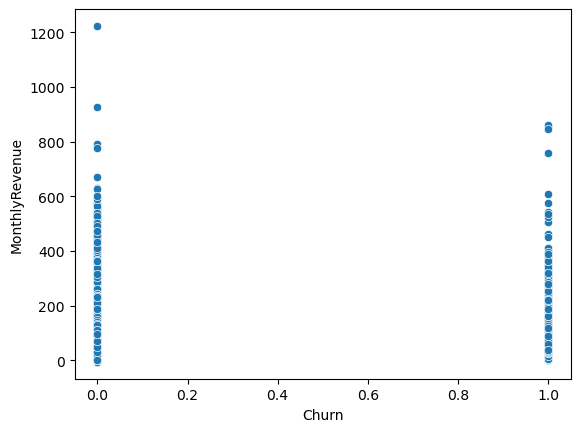

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Churn', y='MonthlyRevenue', data=data)
plt.show()
